In [30]:
# Recurrent Neural Network


%matplotlib inline
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Baser.csv', sep=";")
training_set = dataset_train.iloc[:, 9:10].values

In [31]:
training_set

array([[ 0.09231627],
       [ 0.13058894],
       [ 0.07437283],
       [ 0.07554463],
       [ 0.09963118],
       [ 0.10790804],
       [ 0.13470533],
       [ 0.10071336],
       [ 0.08848982],
       [ 0.10429658],
       [ 0.0927503 ],
       [ 0.10104315],
       [ 0.15154328],
       [ 0.0882005 ],
       [ 0.12764624],
       [ 0.07849816],
       [ 0.11722749],
       [ 0.09893153],
       [ 0.07833011],
       [ 0.09197961],
       [ 0.08716908],
       [ 0.10735171],
       [ 0.14861508],
       [ 0.12779668],
       [ 0.10343693],
       [ 0.08943895],
       [ 0.12037684],
       [ 0.10749823],
       [ 0.13972265],
       [ 0.12044898],
       [ 0.08789613],
       [ 0.10747602],
       [ 0.09720618],
       [ 0.13676948],
       [ 0.12668255],
       [ 0.09452221],
       [ 0.09657981],
       [ 0.06262924],
       [ 0.06204751],
       [ 0.10977188],
       [ 0.11449801],
       [ 0.07431894],
       [ 0.10052076],
       [ 0.09821956],
       [ 0.10288822],
       [ 0

In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [33]:
training_set_scaled.shape

(1000, 1)

In [34]:

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
X_train.shape

(940, 60, 1)

In [38]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [43]:


regressor = Sequential()

droupout = 0.1
layers = 10
epochs = 10

r_sequences = True

regressor.add(LSTM(units = layers, return_sequences = r_sequences, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(droupout))


regressor.add(LSTM(units = layers, return_sequences = r_sequences))
regressor.add(Dropout(droupout))


regressor.add(LSTM(units = layers, return_sequences = r_sequences))
regressor.add(Dropout(droupout))

regressor.add(LSTM(units = layers))
regressor.add(Dropout(droupout))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



regressor.fit(X_train, y_train, epochs = epochs, batch_size = 32)

Epoch 1/10
940/940 [==============================] - 12s - loss: 0.1108    
Epoch 2/10
940/940 [==============================] - 11s - loss: 0.0373    
Epoch 3/10
940/940 [==============================] - 11s - loss: 0.0348    
Epoch 4/10
940/940 [==============================] - 11s - loss: 0.0353    
Epoch 5/10
940/940 [==============================] - 11s - loss: 0.0351    
Epoch 6/10
940/940 [==============================] - 11s - loss: 0.0358    
Epoch 7/10
940/940 [==============================] - 11s - loss: 0.0357    
Epoch 8/10
940/940 [==============================] - 11s - loss: 0.0343    
Epoch 9/10
940/940 [==============================] - 11s - loss: 0.0343    
Epoch 10/10
940/940 [==============================] - 11s - loss: 0.0350    


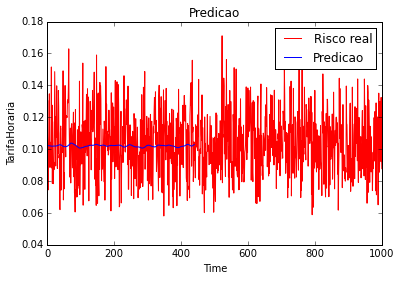

In [42]:

dataset_test = pd.read_csv('Baser.csv',sep=";")
real_tarifa = dataset_test.iloc[:, 9:10].values


dataset_total = pd.concat((dataset_train['TarifaHoraria'], dataset_test['TarifaHoraria']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 500):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_tx = regressor.predict(X_test)
predicted_tx = sc.inverse_transform(predicted_tx)

plt.plot(real_tarifa, color = 'red', label = 'Risco real')
plt.plot(predicted_tx, color = 'blue', label = 'Predicao')
plt.title('Predicao')
plt.xlabel('Time')
plt.ylabel('TarifaHoraria')
plt.legend()
plt.show()